In [1]:
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import MaxAbsScaler
from sklearn.model_selection import LeaveOneOut
import numpy as np
import pandas as pd
import keras_tuner as kt
from sklearn import metrics
import datetime
import re
import os
import seaborn as sns

In [2]:
data = pd.read_excel('./etching.xlsx')

In [3]:
x_full_df = data[['Pressure', 'RF Power', 'Electrode Gap', 'CCL_4 Flow', 'HE Flow', 'O2 Flow']].astype(float)
y_full_df = data[['Etch Rate -Rp A/min', 'Etch Uniformity', 'Oxide Selectivity - Sox', 'Photoresist Selectivity - Sph']].astype(float)

In [4]:
x_full = x_full_df.to_numpy()
y_full = y_full_df.to_numpy()

In [5]:
x_scaler = MaxAbsScaler().fit(x_full)
y_scaler = MaxAbsScaler().fit(y_full)
x_scaled_full = x_scaler.transform(x_full)
y_scaled_full = y_scaler.transform(y_full)

In [32]:
model = keras.models.load_model('./models/em_rt_v0_1_2022_02_16_23_53')
# model = keras.models.load_model('./models/em_bt_v0_1_2022_02_17_00_03')

In [33]:
predictions = y_scaler.inverse_transform(model.predict(x_scaled_full))

In [34]:
etch_rate_target, uniformity_target, oxide_sel_target, pr_sel_target = y_full.T
etch_rate_actual, uniformity_actual, oxide_sel_actual, pr_sel_actual = predictions.T

<AxesSubplot:>

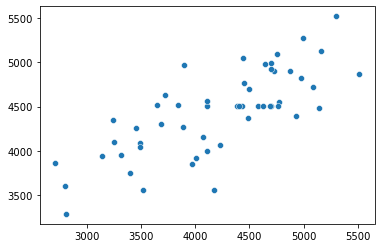

In [35]:
sns.scatterplot(x=etch_rate_target, y=etch_rate_actual)

<AxesSubplot:ylabel='Count'>

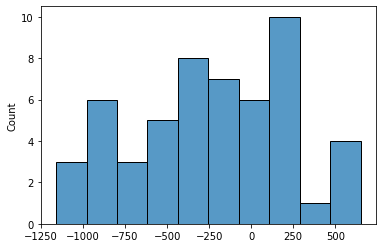

In [36]:
etch_rate_error = etch_rate_target - etch_rate_actual
sns.histplot(data=etch_rate_error, bins=10)

<AxesSubplot:>

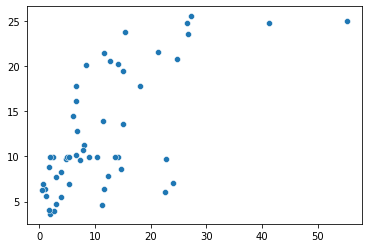

In [37]:
sns.scatterplot(x=uniformity_target, y=uniformity_actual)

<AxesSubplot:ylabel='Count'>

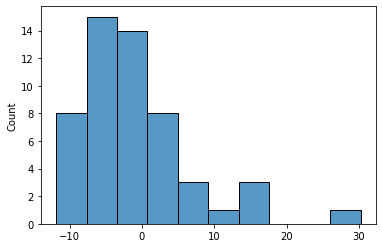

In [38]:
uniformity_error = uniformity_target - uniformity_actual
sns.histplot(data=uniformity_error, bins=10)

<AxesSubplot:>

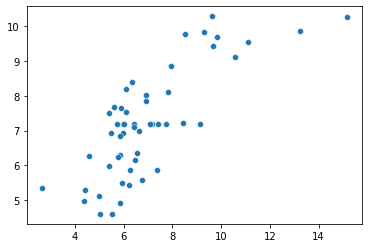

In [39]:
sns.scatterplot(x=oxide_sel_target, y=oxide_sel_actual)

<AxesSubplot:ylabel='Count'>

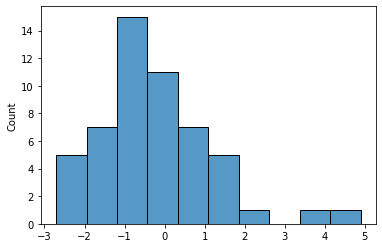

In [40]:
oxide_sel_error = oxide_sel_target - oxide_sel_actual
sns.histplot(data=oxide_sel_error, bins=10)

<AxesSubplot:>

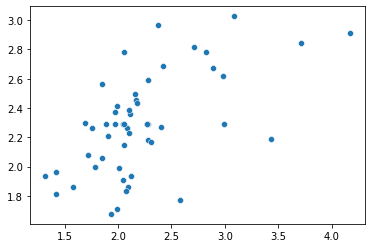

In [41]:
sns.scatterplot(x=pr_sel_target, y=pr_sel_actual)

<AxesSubplot:ylabel='Count'>

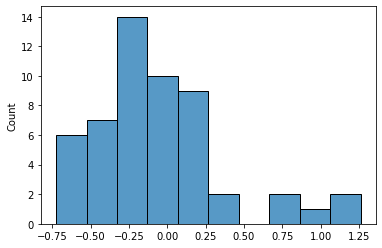

In [42]:
pr_sel_error = pr_sel_target - pr_sel_actual
sns.histplot(data=pr_sel_error, bins=10)

In [43]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_layer_0 (Dense)       multiple                  2688      
_________________________________________________________________
hidden_layer_1 (Dense)       multiple                  147840    
_________________________________________________________________
hidden_layer_2 (Dense)       multiple                  147840    
_________________________________________________________________
hidden_layer_3 (Dense)       multiple                  147840    
_________________________________________________________________
hidden_layer_4 (Dense)       multiple                  147840    
_________________________________________________________________
output_layer (Dense)         multiple                  1540      
Total params: 595,588
Trainable params: 595,588
Non-trainable params: 0
________________________________________________

In [44]:
model.get_config()

{'name': 'sequential_1',
 'layers': [{'class_name': 'Dense',
   'config': {'name': 'hidden_layer_0',
    'trainable': True,
    'dtype': 'float32',
    'units': 384,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None,
    'batch_input_shape': [None, 6]}},
  {'class_name': 'Dense',
   'config': {'name': 'hidden_layer_1',
    'trainable': True,
    'dtype': 'float32',
    'units': 384,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel